In [1]:
#import libraries

import numpy as np
import pandas as pd
import random as rd
import sklearn.datasets
import sklearn.cluster
import sklearn.decomposition
import tensorflow

np.set_printoptions(suppress=True)
np.set_printoptions(threshold=10)

import matplotlib.pyplot as plt
%matplotlib inline

from ipywidgets import interact, interactive, fixed, interact_manual

import seaborn as sns; sns.set()
from sklearn.cluster import KMeans
from sklearn import cluster
import sklearn

from sklearn.decomposition import PCA 
from matplotlib import colors as mcolors 
import math 
from mpl_toolkits.mplot3d import Axes3D 

# Clean Data (512 Variables)

In [2]:
df = np.load('ps3_genetic_fingerprints.npy')   # 16,930 patients' genetic fingerprints
z = np.load('ps3_patient_zet.npy')                   # patient Z's genetic fingerprint

In [3]:
df = pd.DataFrame(df)   # Convert to dataframe from NP
df = df.add_prefix('g')    # Add "g" in front of each variable
z = z.T                            # Transpose to match df format (nX512)
z = pd.DataFrame(z)      # Convert patient Z to dataframe from NP
z = z.add_prefix('g')       # Add "g" in front of each variable
df.shape, z.shape           # Dimension of both dataframes

((16930, 512), (512, 1))

## Inertia/Elbow Test

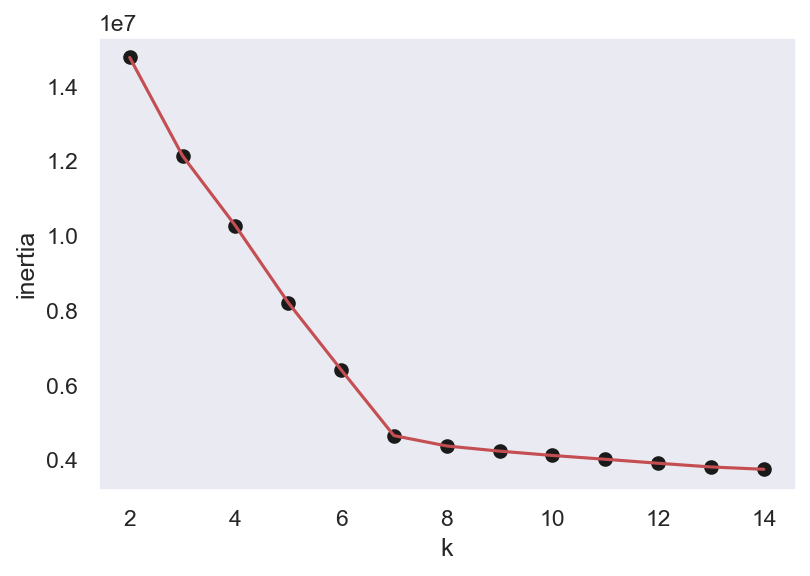

7 Clusters are optimal.


In [4]:
x = list(range(2, 15))                                      # K-cluster numbers range from 2 to 15
inertia = [ ]
for i in x: 
    kmeans = KMeans(n_clusters = i).fit(df)
    inertia.append(kmeans.inertia_)                # Run Elbow test for K-clusters 2 to 15
    
plt.figure(dpi=150)
plt.plot(x, inertia, 'ko')
plt.plot(x, inertia, 'r-')
plt.xlabel('k'); plt.ylabel('inertia')
plt.grid(); plt.show(); print ('7 Clusters are optimal.')

## Silhouette Test

Number Of Clusters:
2
Silhouette score value
0.21129616
Number Of Clusters:
3
Silhouette score value
0.25146708
Number Of Clusters:
4
Silhouette score value
0.30132455
Number Of Clusters:
5
Silhouette score value
0.3571811
Number Of Clusters:
6
Silhouette score value
0.4097175
Number Of Clusters:
7
Silhouette score value
0.46983477
Number Of Clusters:
8
Silhouette score value
0.44186792
Number Of Clusters:
9
Silhouette score value
0.39999488
Number Of Clusters:
10
Silhouette score value
0.3579145
Number Of Clusters:
11
Silhouette score value
0.31315267
Number Of Clusters:
12
Silhouette score value
0.2662324
Number Of Clusters:
13
Silhouette score value
0.22868767
Number Of Clusters:
14
Silhouette score value
0.18583578


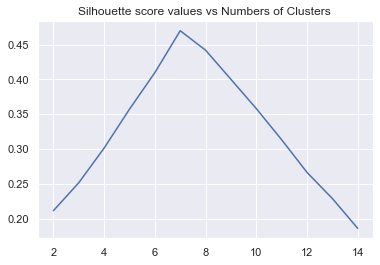

Optimal number of components is:
7


In [5]:
silhouette_score_values=list()
 
NumberOfClusters=range(2,15)                 # K-cluster numbers range from 2 to 15
 
for i in NumberOfClusters:
    
    classifier=cluster.KMeans(i,init='k-means++', n_init=50, max_iter=300, tol=0.0001, verbose=0, random_state=None, copy_x=True)
    classifier.fit(df)
    labels= classifier.predict(df)
    print ("Number Of Clusters:")
    print (i)
    print ("Silhouette score value")
    print (sklearn.metrics.silhouette_score(df,labels ,metric='euclidean', sample_size=None, random_state=None))
    silhouette_score_values.append(sklearn.metrics.silhouette_score(df,labels ,metric='euclidean', sample_size=None, random_state=None))
 
plt.plot(NumberOfClusters, silhouette_score_values)
plt.title("Silhouette score values vs Numbers of Clusters ")
plt.show()
 
Optimal_NumberOf_Components=NumberOfClusters[silhouette_score_values.index(max(silhouette_score_values))]
print ("Optimal number of components is:")
print (Optimal_NumberOf_Components)

## Visualize the clusters (512 Variables)

### Cluster = 6

In [6]:
kmeans6 = KMeans(6,init='k-means++', n_init= 50, max_iter=300, tol=0.0001, verbose=0, random_state=None, copy_x=True).fit(df)

print(kmeans6.labels_)

[3 3 4 ... 1 5 5]


### Principal Component Analysis (3D)

In [7]:
pca = PCA(3)
pca.fit(df)

pca_data = pd.DataFrame(pca.transform(df))

print(pca_data.head())

           0          1          2
0  20.469740  -5.655361  -8.863655
1  32.173153  -5.625062 -12.933926
2  -4.991108 -16.555027  -2.681210
3  25.993580 -10.613045  -9.136916
4  35.301239 -12.995600 -11.019128


In [8]:
colors = list(zip(*sorted(( 
                    tuple(mcolors.rgb_to_hsv( 
                          mcolors.to_rgba(color)[:3])), name) 
                     for name, color in dict( 
                            mcolors.BASE_COLORS, **mcolors.CSS4_COLORS 
                                                      ).items())))[1] 
   
   
# number of steps to taken generate n(clusters) colors  
skips = math.floor(len(colors[5 : -5])/6) 
cluster_colors = colors[5 : -5 : skips] 

### Scatter Plot for 6 Clusters

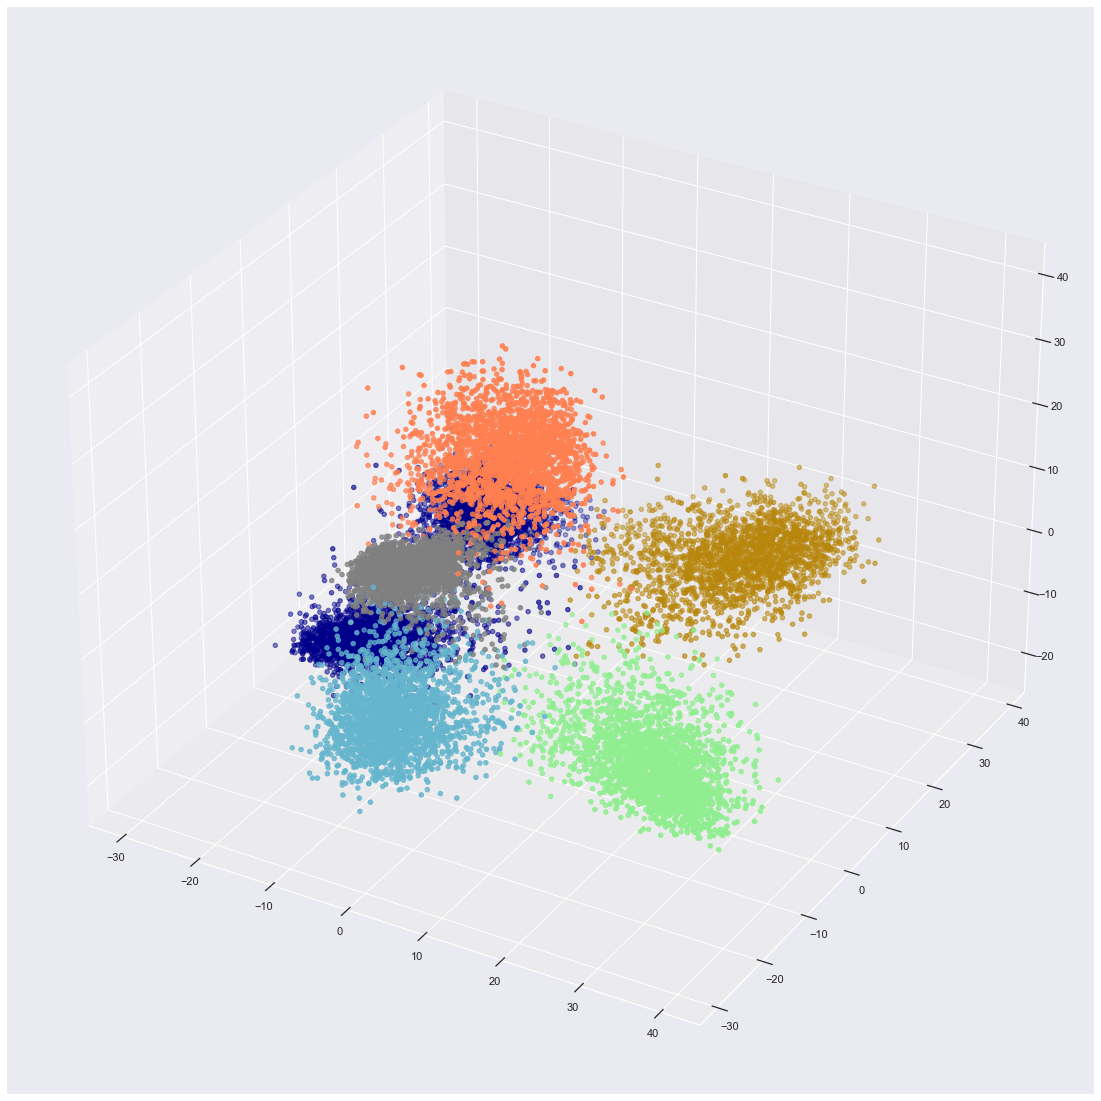

In [9]:
fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(111, projection = '3d') 
ax.scatter(pca_data[0], pca_data[1], pca_data[2],  
           c = list(map(lambda label : cluster_colors[label], 
                                            kmeans6.labels_))) 

plt.show() 

### Cluster = 7

In [10]:
kmeans7 = KMeans(7,init='k-means++', n_init=50, max_iter=300, tol=0.0001, verbose=0, random_state=None, copy_x=True).fit(df)

print(kmeans7.labels_)

[5 5 0 ... 4 1 1]


In [11]:
# number of steps to taken generate n(clusters) colors  
skips = math.floor(len(colors[5 : -5])/7) 
cluster_colors = colors[5 : -5 : skips] 

### Scatter Plot for 7 Clusters

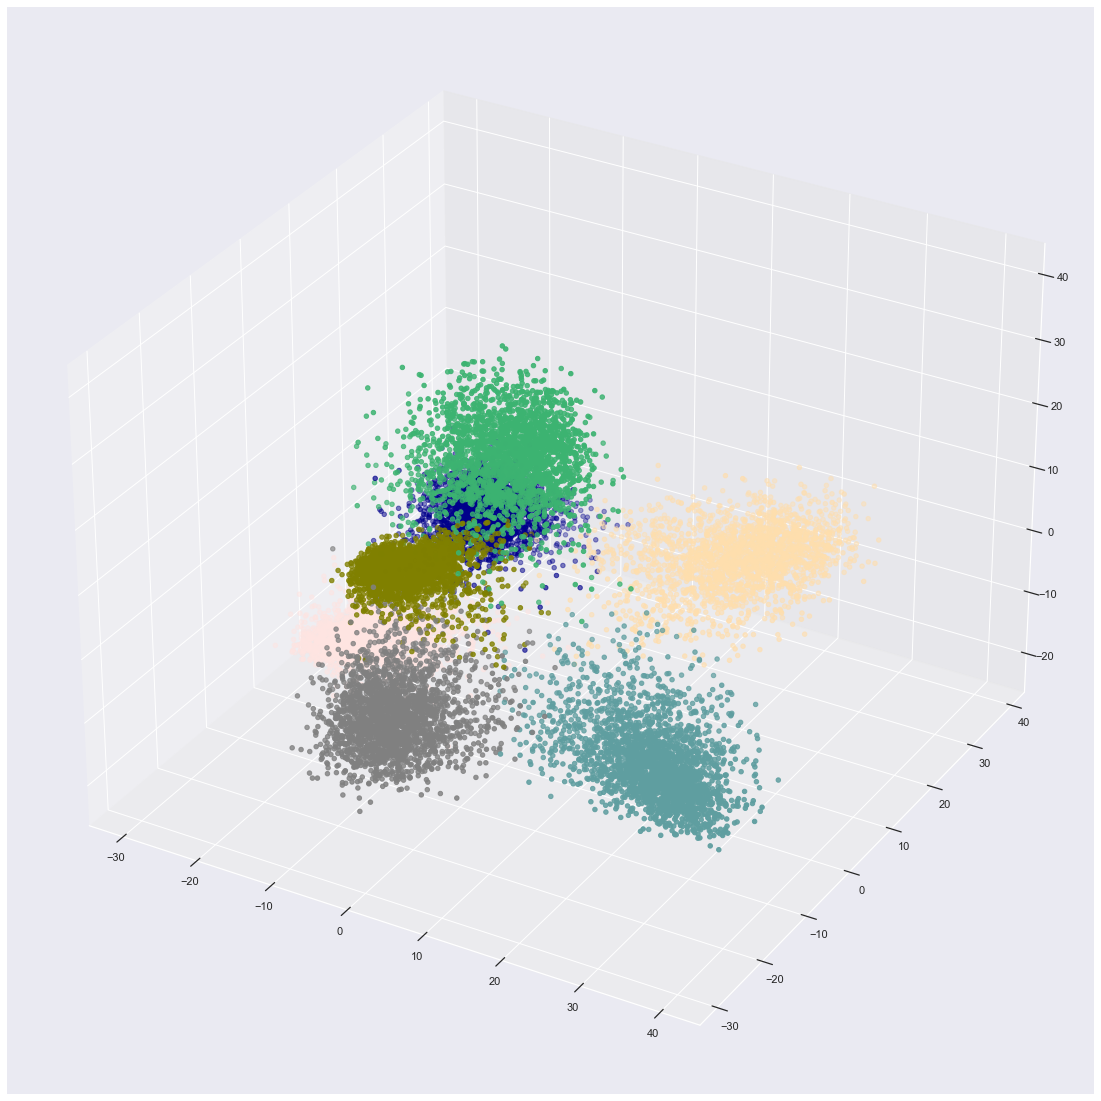

In [12]:
from mpl_toolkits.mplot3d import Axes3D 
import matplotlib.pyplot as plt 
   
fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(111, projection = '3d') 
ax.scatter(pca_data[0], pca_data[1], pca_data[2],  
           c = list(map(lambda label : cluster_colors[label], 
                                            kmeans7.labels_))) 
   
plt.show() 

### Cluster = 8

In [13]:
kmeans8 = KMeans(8,init='k-means++', n_init=50, max_iter=300, tol=0.0001, verbose=0, random_state=None, copy_x=True).fit(df)

print(kmeans8.labels_)

[0 0 2 ... 5 3 3]


In [14]:
# number of steps to taken generate n(clusters) colors  
skips = math.floor(len(colors[5 : -5])/8) 
cluster_colors = colors[5 : -5 : skips] 

### Scatter Plot for 8 Clusters

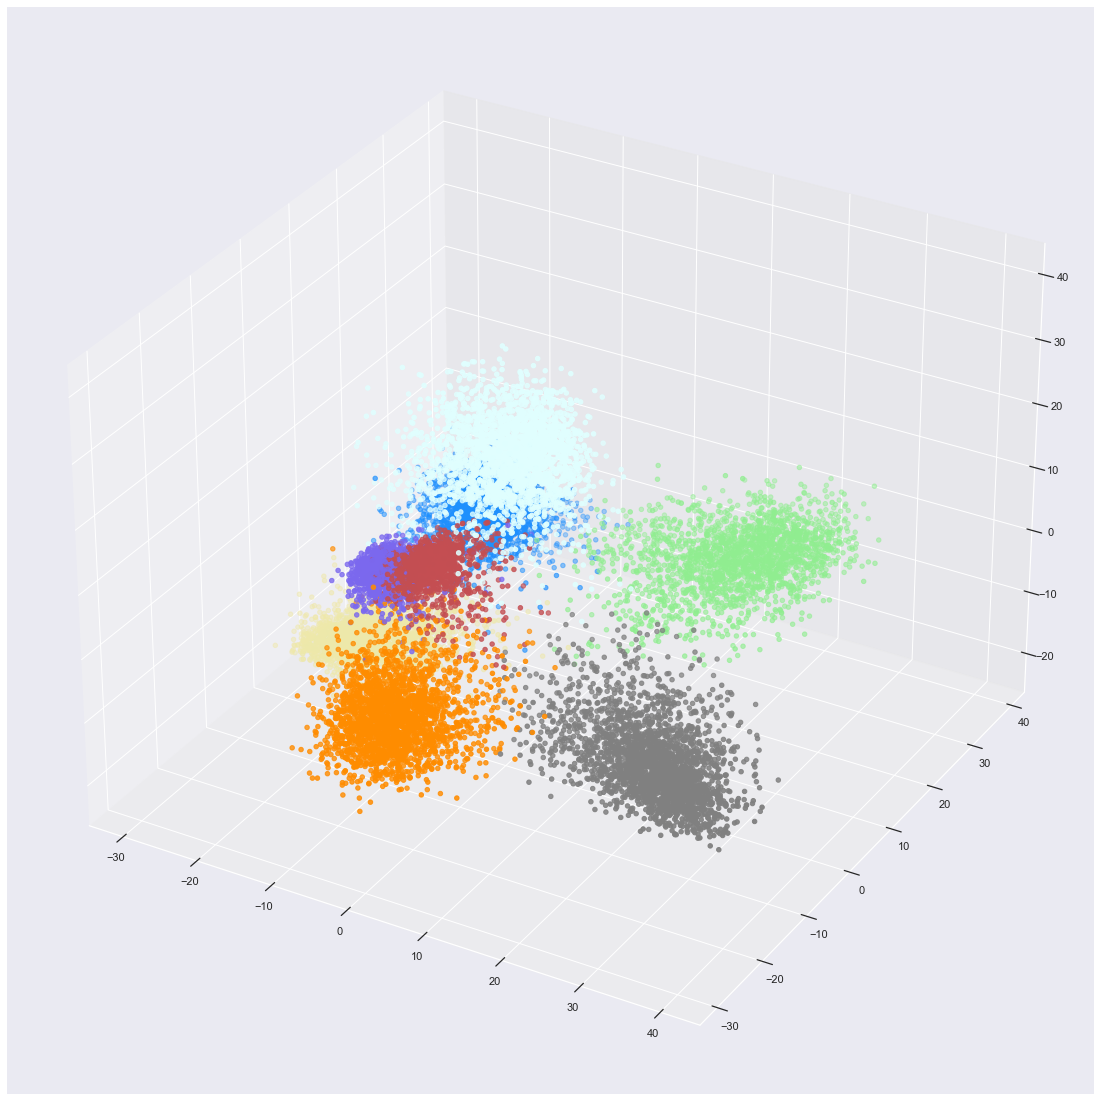

In [15]:
from mpl_toolkits.mplot3d import Axes3D 
import matplotlib.pyplot as plt 
   
fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(111, projection = '3d') 
ax.scatter(pca_data[0], pca_data[1], pca_data[2],  
           c = list(map(lambda label : cluster_colors[label], 
                                            kmeans8.labels_))) 
   
plt.show() 

# Trimmed Data (397 Variables) - Removed Unneccessary Fingerprints?

In [16]:
df.mean()                                              # There are multiple variables with no variations but 0.
                                                             # If the mean of column(variable) = 0, that variable does not have variations in values.

df0 = df.loc[:, (df != 0).any(axis=0)]     # Drop columns with mean = 0

df0.shape

(16930, 397)

## Inertia/Elbow Test

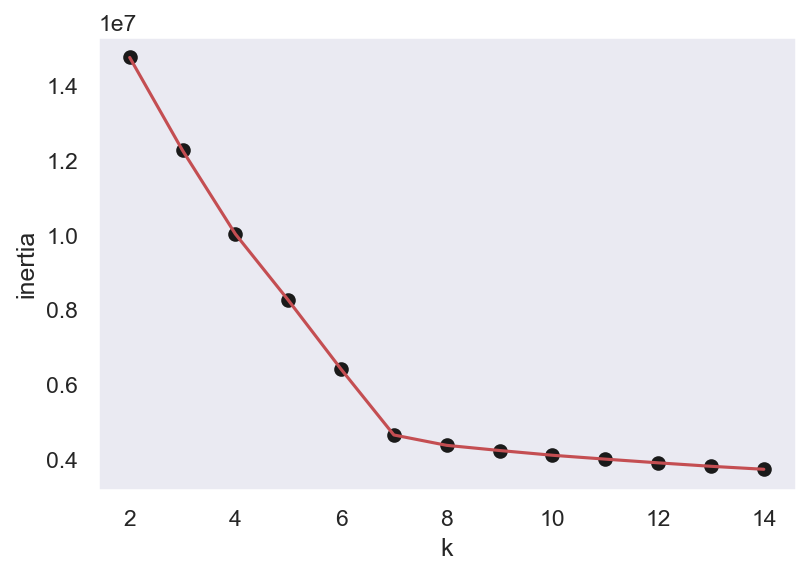

7 Clusters are optimal.


In [17]:
x = list(range(2, 15))                                      # K-cluster numbers range from 2 to 15
inertia = [ ]
for i in x: 
    kmeans0 = KMeans(n_clusters = i).fit(df0)
    inertia.append(kmeans0.inertia_)                # Run Elbow test for K-clusters 2 to 15
    
plt.figure(dpi=150)
plt.plot(x, inertia, 'ko')
plt.plot(x, inertia, 'r-')
plt.xlabel('k'); plt.ylabel('inertia')
plt.grid(); plt.show(); print ('7 Clusters are optimal.')

## Silhouette Test

Number Of Clusters:
2
Silhouette score value
0.21129616
Number Of Clusters:
3
Silhouette score value
0.25146708
Number Of Clusters:
4
Silhouette score value
0.30482665
Number Of Clusters:
5
Silhouette score value
0.35718197
Number Of Clusters:
6
Silhouette score value
0.4097175
Number Of Clusters:
7
Silhouette score value
0.46983477
Number Of Clusters:
8
Silhouette score value
0.44186792
Number Of Clusters:
9
Silhouette score value
0.40004674
Number Of Clusters:
10
Silhouette score value
0.3578574
Number Of Clusters:
11
Silhouette score value
0.3133803
Number Of Clusters:
12
Silhouette score value
0.26626
Number Of Clusters:
13
Silhouette score value
0.22253403
Number Of Clusters:
14
Silhouette score value
0.18557325


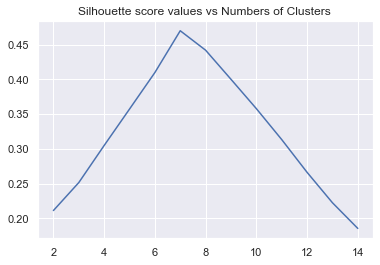

Optimal number of components is:
7


In [18]:
silhouette_score_values=list()
 
NumberOfClusters=range(2,15)                 # K-cluster numbers range from 2 to 15
 
for i in NumberOfClusters:
    
    classifier=cluster.KMeans(i,init='k-means++', n_init=50, max_iter=300, tol=0.0001, verbose=0, random_state=None, copy_x=True)
    classifier.fit(df0)
    labels= classifier.predict(df0)
    print ("Number Of Clusters:")
    print (i)
    print ("Silhouette score value")
    print (sklearn.metrics.silhouette_score(df0,labels ,metric='euclidean', sample_size=None, random_state=None))
    silhouette_score_values.append(sklearn.metrics.silhouette_score(df0,labels ,metric='euclidean', sample_size=None, random_state=None))
 
plt.plot(NumberOfClusters, silhouette_score_values)
plt.title("Silhouette score values vs Numbers of Clusters ")
plt.show()
 
Optimal_NumberOf_Components=NumberOfClusters[silhouette_score_values.index(max(silhouette_score_values))]
print ("Optimal number of components is:")
print (Optimal_NumberOf_Components)

## Visualize the clusters (397 Variables)

### Cluster = 6

In [19]:
kmeans60 = KMeans(6,init='k-means++', n_init= 50, max_iter=300, tol=0.0001, verbose=0, random_state=None, copy_x=True).fit(df0)

print(kmeans60.labels_)

[2 2 5 ... 4 1 1]


### Principal Component Analysis (3D)

In [20]:
pca = PCA(3)
pca.fit(df0)

pca_data0 = pd.DataFrame(pca.transform(df0))

print(pca_data0.head())

           0          1          2
0  20.469749  -5.655346  -8.863645
1  32.173164  -5.625039 -12.933912
2  -4.991087 -16.555029  -2.681189
3  25.993603 -10.613024  -9.136906
4  35.301262 -12.995569 -11.019112


In [21]:
# number of steps to taken generate n(clusters) colors  
skips = math.floor(len(colors[5 : -5])/6) 
cluster_colors = colors[5 : -5 : skips] 

### Scatter Plot for 6 Clusters

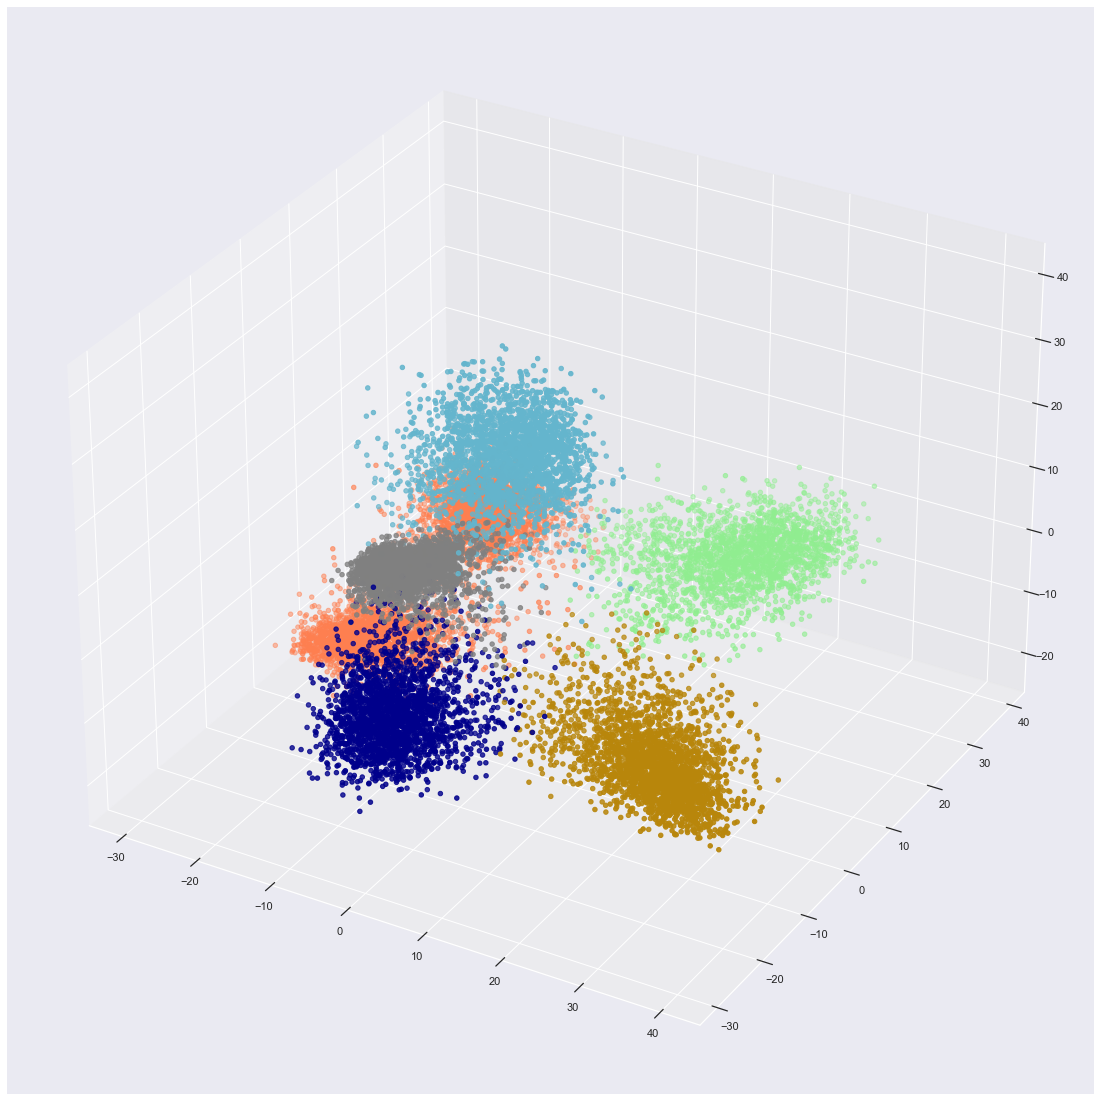

In [22]:
fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(111, projection = '3d') 
ax.scatter(pca_data0[0], pca_data0[1], pca_data0[2],  
           c = list(map(lambda label : cluster_colors[label], 
                                            kmeans60.labels_))) 

plt.show() 

### Cluster = 7

In [23]:
kmeans70 = KMeans(7,init='k-means++', n_init=50, max_iter=300, tol=0.0001, verbose=0, random_state=None, copy_x=True).fit(df0)

print(kmeans70.labels_)

[3 3 6 ... 2 1 1]


In [24]:
# number of steps to taken generate n(clusters) colors  
skips = math.floor(len(colors[5 : -5])/7) 
cluster_colors = colors[5 : -5 : skips] 

### Scatter Plot for 7 Clusters

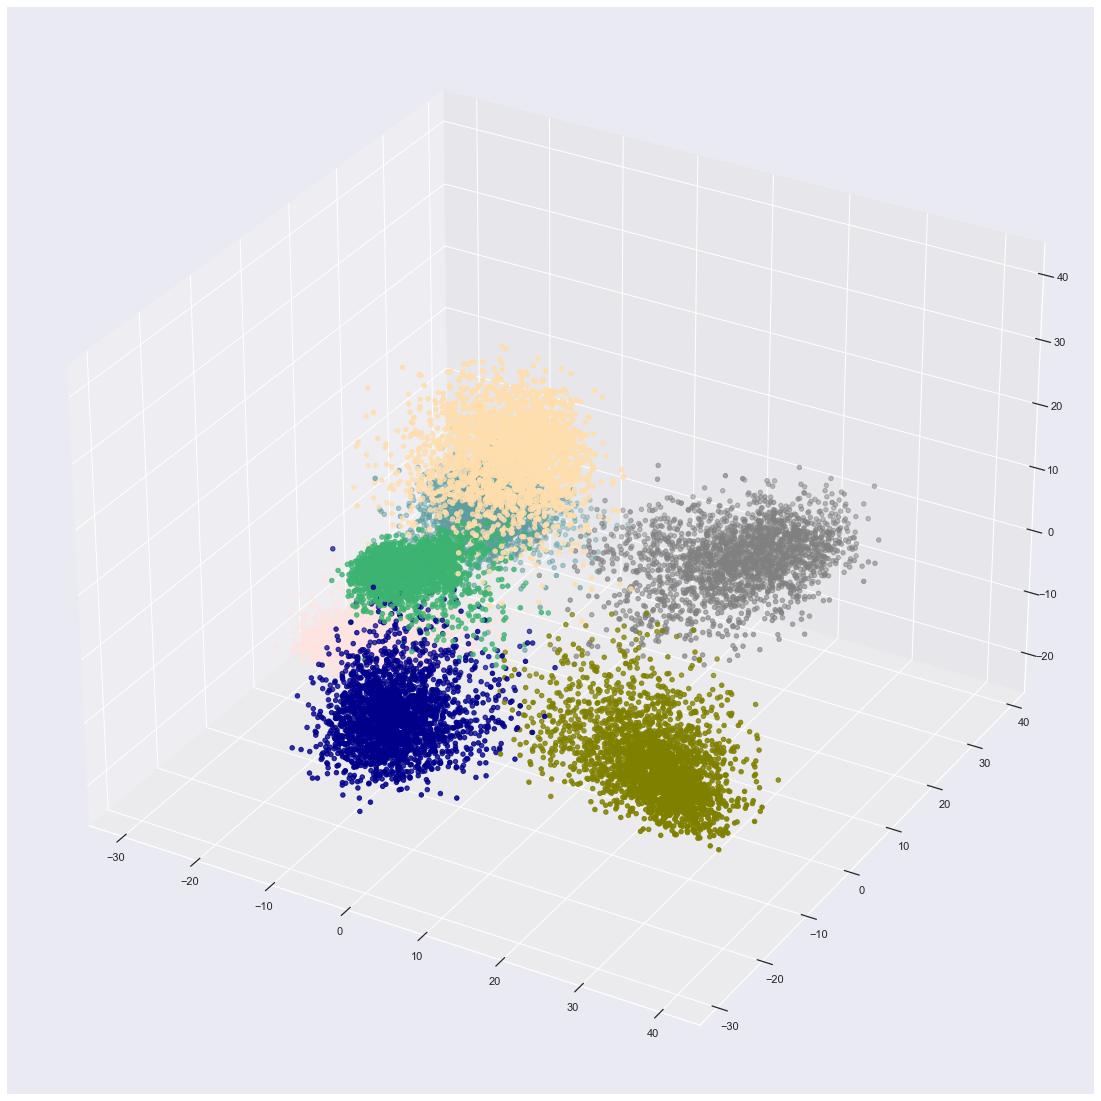

In [25]:
from mpl_toolkits.mplot3d import Axes3D 
import matplotlib.pyplot as plt 
   
fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(111, projection = '3d') 
ax.scatter(pca_data0[0], pca_data0[1], pca_data0[2],  
           c = list(map(lambda label : cluster_colors[label], 
                                            kmeans70.labels_))) 
   
plt.show() 

### Cluster = 8

In [26]:
kmeans80 = KMeans(8,init='k-means++', n_init=50, max_iter=300, tol=0.0001, verbose=0, random_state=None, copy_x=True).fit(df0)

print(kmeans80.labels_)

[1 1 5 ... 2 0 0]


In [27]:
# number of steps to taken generate n(clusters) colors  
skips = math.floor(len(colors[5 : -5])/8) 
cluster_colors = colors[5 : -5 : skips] 

### Scatter Plot for 8 Clusters

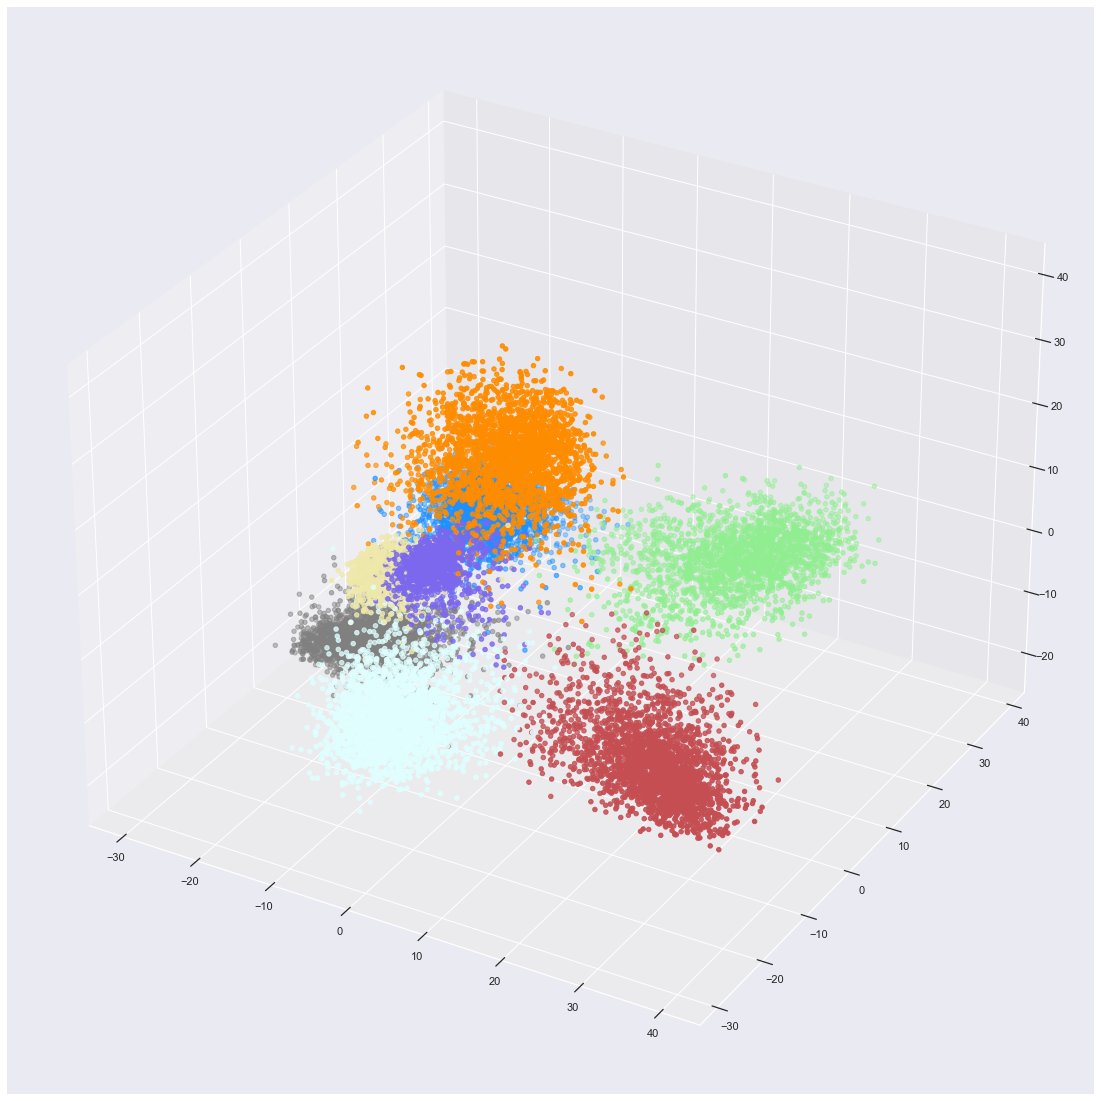

In [28]:
from mpl_toolkits.mplot3d import Axes3D 
import matplotlib.pyplot as plt 
   
fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(111, projection = '3d') 
ax.scatter(pca_data0[0], pca_data0[1], pca_data0[2],  
           c = list(map(lambda label : cluster_colors[label], 
                                            kmeans80.labels_))) 
   
plt.show() 

# Even More Trimmed Data - Correlation Heatmap

## Feature Selection (corr > 0.7, 0.8, 0.9)

In [29]:
threshold7 = 0.7                          # Threshold for keeping correlated features
threshold8 = 0.8
threshold9 = 0.9

corr_matrix = df0.corr().abs()     # Absolute value correlation matrix

upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
upper.head()                              # Upper section of correlation matrix

g1        g4        g5        g6        g7        g8        g9       g10  \
g1 NaN  0.004695  0.004839  0.005090  0.005611  0.000095  0.012407  0.000095   
g4 NaN       NaN  0.120750  0.163855  0.876176  0.003086  0.122693  0.003086   
g5 NaN       NaN       NaN  0.031417  0.017820  0.014897  0.117455  0.003005   
g6 NaN       NaN       NaN       NaN  0.184841  0.007638  0.129288  0.003160   
g7 NaN       NaN       NaN       NaN       NaN  0.003484  0.141244  0.003484   

         g13       g14  ...      g500      g501      g502      g503      g504  \
g1  0.000386  0.010658  ...  0.000127  0.000529  0.000855  0.002714  0.009174   
g4  0.000780  0.355276  ...  0.004124  0.016812  0.075451  0.088028  0.176078   
g5  0.001661  0.169417  ...  0.004015  0.016720  0.150384  0.023289  0.318690   
g6  0.006137  0.383521  ...  0.004223  0.017587  0.228245  0.382239  0.342304   
g7  0.000780  0.397310  ...  0.004329  0.018499  0.040020  0.099380  0.251716   

        g505      g507      g508      g510      g511  
g1  0.006126  0.015566  0.000145  0.000688  0.000528  
g4  0.190814  0.165907  0.019385  0.022311  0.115359  
g5  0.144422  0.284515  0.004591  0.015331  0.016344  
g6  0.177150  0.199225  0.004829  0.022848  0.017529  
g7  0.222803  0.240281  0.020330  0.020712  0.099551  

[5 rows x 397 columns]

In [30]:
keep7 = [column for column in upper.columns if any(upper[column] > threshold7)]

print ('There are %d features to keep.' % (len(keep7)))

There are 148 features to keep.


In [31]:
keep8 = [column for column in upper.columns if any(upper[column] > threshold8)]

print ('There are %d features to keep.' % (len(keep8)))

There are 86 features to keep.


In [32]:
keep9 = [column for column in upper.columns if any(upper[column] > threshold9)]

print ('There are %d features to keep.' % (len(keep9)))

There are 12 features to keep.


## Data

In [33]:
df7 = df0[keep7]            # Data with features with correlation > 0.7
df8 = df0[keep8]            # Data with features with correlation > 0.8
df9 = df0[keep9]            # Data with features with correlation > 0.9

## Inertia/Elbow Test for corr > 0.7

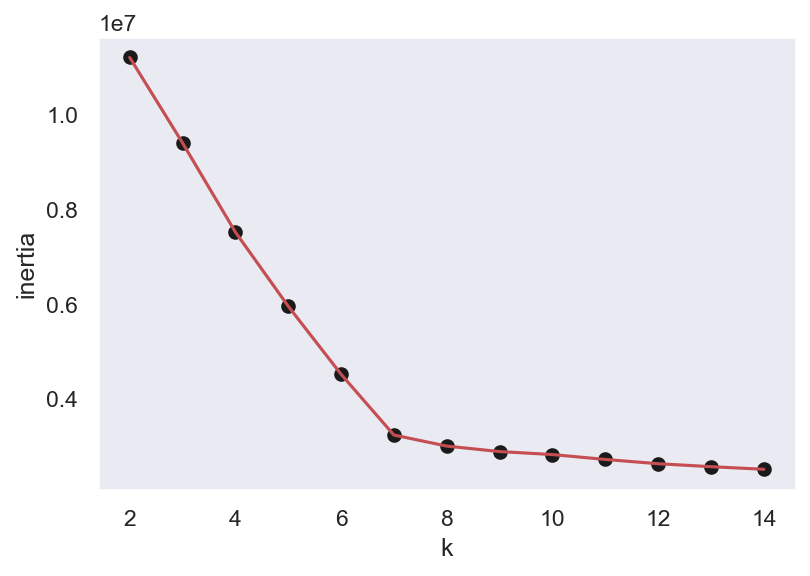

7 Clusters are optimal.


In [34]:
x = list(range(2,15))                                      # K-cluster numbers range from 2 to 15
inertia = [ ]
for i in x: 
    kmeans = KMeans(n_clusters = i).fit(df7)
    inertia.append(kmeans.inertia_)                # Run Elbow test for K-clusters 2 to 15
    
plt.figure(dpi=150)
plt.plot(x, inertia, 'ko')
plt.plot(x, inertia, 'r-')
plt.xlabel('k'); plt.ylabel('inertia')
plt.grid(); plt.show(); print ('7 Clusters are optimal.')

## Silhouette Test for corr > 0.7

Number Of Clusters:
2
Silhouette score value
0.23117444
Number Of Clusters:
3
Silhouette score value
0.26802528
Number Of Clusters:
4
Silhouette score value
0.3256649
Number Of Clusters:
5
Silhouette score value
0.38232428
Number Of Clusters:
6
Silhouette score value
0.43224752
Number Of Clusters:
7
Silhouette score value
0.48925084
Number Of Clusters:
8
Silhouette score value
0.46721783
Number Of Clusters:
9
Silhouette score value
0.42701986
Number Of Clusters:
10
Silhouette score value
0.37956026
Number Of Clusters:
11
Silhouette score value
0.3354943
Number Of Clusters:
12
Silhouette score value
0.28752363
Number Of Clusters:
13
Silhouette score value
0.24924323
Number Of Clusters:
14
Silhouette score value
0.23573737


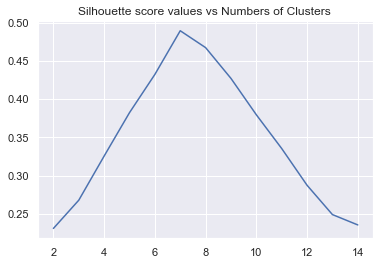

Optimal number of components is:
7


In [35]:
silhouette_score_values=list()
 
NumberOfClusters=range(2,15)                 # K-cluster numbers range from 2 to 15
 
for i in NumberOfClusters:
    
    classifier=cluster.KMeans(i,init='k-means++', n_init=50, max_iter=300, tol=0.0001, verbose=0, random_state=None, copy_x=True)
    classifier.fit(df7)
    labels= classifier.predict(df7)
    print ("Number Of Clusters:")
    print (i)
    print ("Silhouette score value")
    print (sklearn.metrics.silhouette_score(df7,labels ,metric='euclidean', sample_size=None, random_state=None))
    silhouette_score_values.append(sklearn.metrics.silhouette_score(df7,labels ,metric='euclidean', sample_size=None, random_state=None))
 
plt.plot(NumberOfClusters, silhouette_score_values)
plt.title("Silhouette score values vs Numbers of Clusters ")
plt.show()
 
Optimal_NumberOf_Components=NumberOfClusters[silhouette_score_values.index(max(silhouette_score_values))]
print ("Optimal number of components is:")
print (Optimal_NumberOf_Components)

## Visualize the clusters (corr > 0.7)

### Cluster = 6

In [36]:
kmeans6 = KMeans(6,init='k-means++', n_init= 50, max_iter=300, tol=0.0001, verbose=0, random_state=None, copy_x=True).fit(df7)

print(kmeans6.labels_)

[2 2 4 ... 5 1 1]


### Principal Component Analysis (3D)

In [37]:
pca = PCA(3)
pca.fit(df7)

pca_data = pd.DataFrame(pca.transform(df7))

print(pca_data.head())

           0          1          2
0  19.554317  -4.089657  -7.328578
1  31.043755  -2.257303 -11.347823
2  -2.218052 -13.924625  -4.718969
3  24.936762  -9.215536  -7.123221
4  33.690968 -10.410686  -9.985922


In [38]:
# number of steps to taken generate n(clusters) colors  
skips = math.floor(len(colors[5 : -5])/6) 
cluster_colors = colors[5 : -5 : skips] 

### Scatter Plot for 6 Clusters

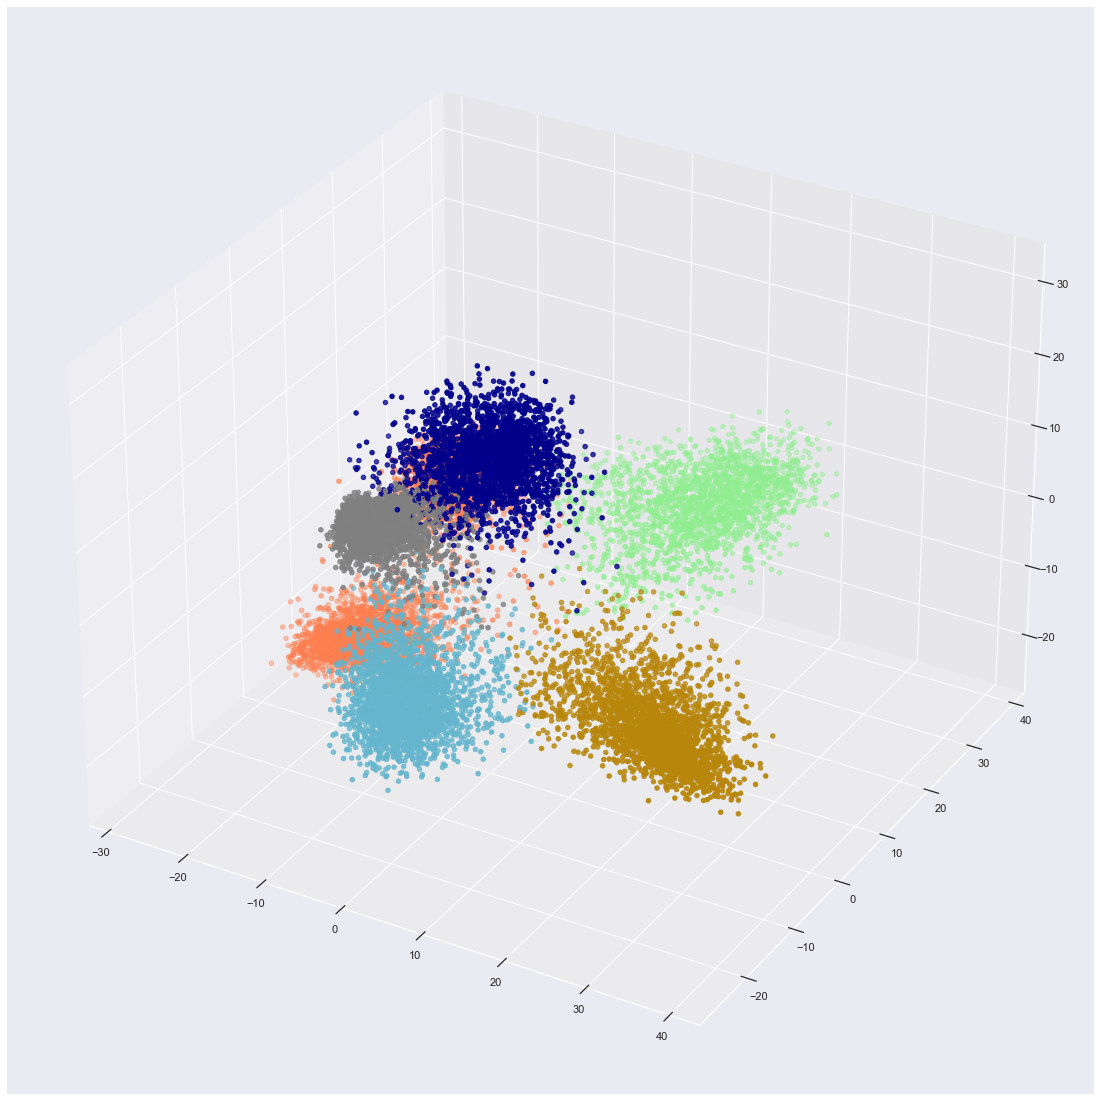

In [39]:
fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(111, projection = '3d') 
ax.scatter(pca_data[0], pca_data[1], pca_data[2],  
           c = list(map(lambda label : cluster_colors[label], 
                                            kmeans6.labels_))) 

plt.show() 

### Cluster = 7

In [40]:
kmeans7 = KMeans(7,init='k-means++', n_init=50, max_iter=300, tol=0.0001, verbose=0, random_state=None, copy_x=True).fit(df7)

print(kmeans7.labels_)

[3 3 5 ... 6 0 0]


In [41]:
# number of steps to taken generate n(clusters) colors  
skips = math.floor(len(colors[5 : -5])/7) 
cluster_colors = colors[5 : -5 : skips] 

### Scatter Plot for 7 Clusters

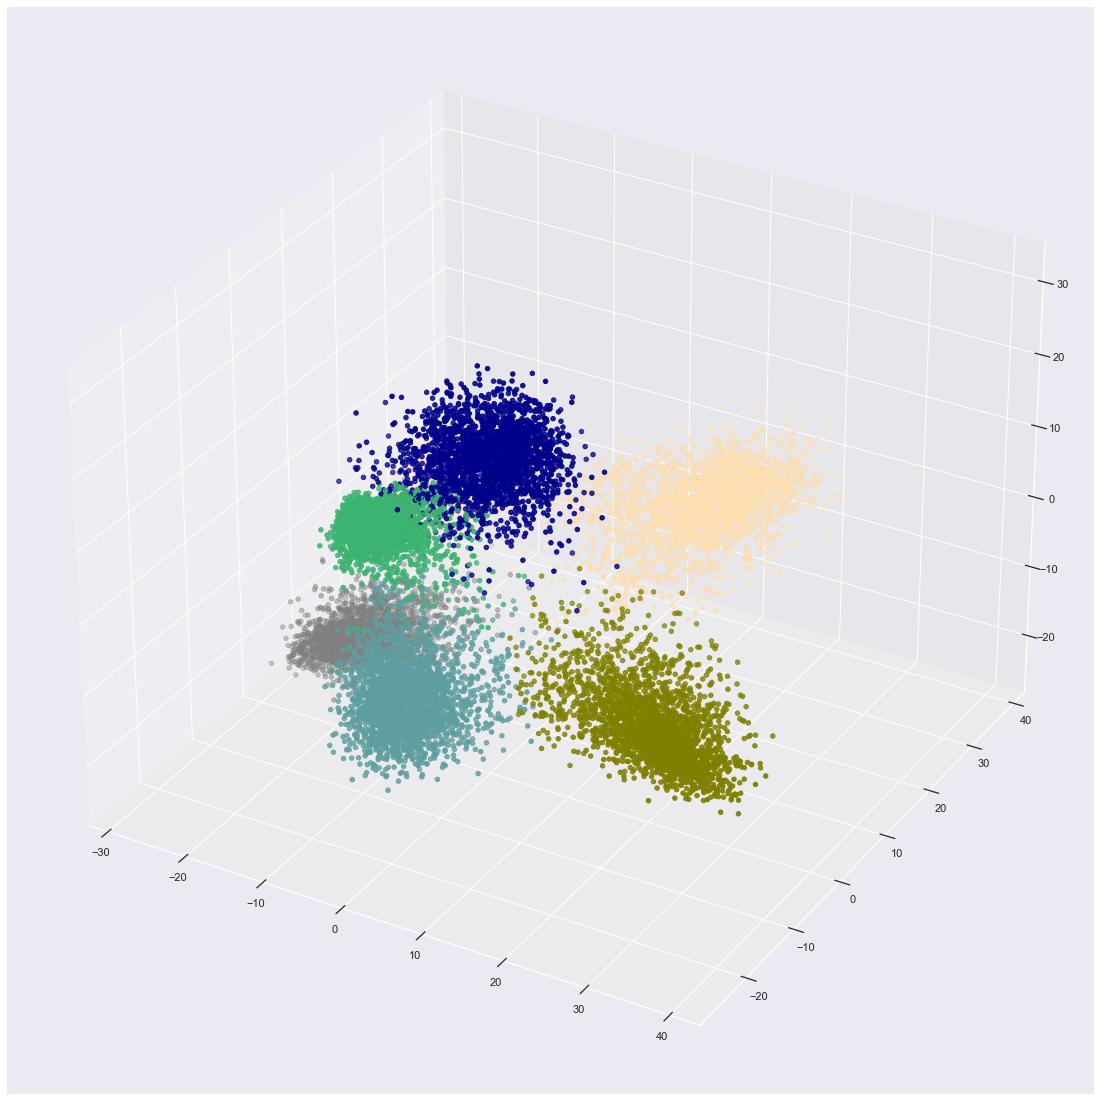

In [42]:
from mpl_toolkits.mplot3d import Axes3D 
import matplotlib.pyplot as plt 
   
fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(111, projection = '3d') 
ax.scatter(pca_data[0], pca_data[1], pca_data[2],  
           c = list(map(lambda label : cluster_colors[label], 
                                            kmeans7.labels_))) 
   
plt.show() 

### Cluster = 8

In [43]:
kmeans8 = KMeans(8,init='k-means++', n_init=50, max_iter=300, tol=0.0001, verbose=0, random_state=None, copy_x=True).fit(df7)

print(kmeans8.labels_)

[4 4 1 ... 2 5 5]


In [44]:
# number of steps to taken generate n(clusters) colors  
skips = math.floor(len(colors[5 : -5])/8) 
cluster_colors = colors[5 : -5 : skips] 

### Scatter Plot for 8 Clusters

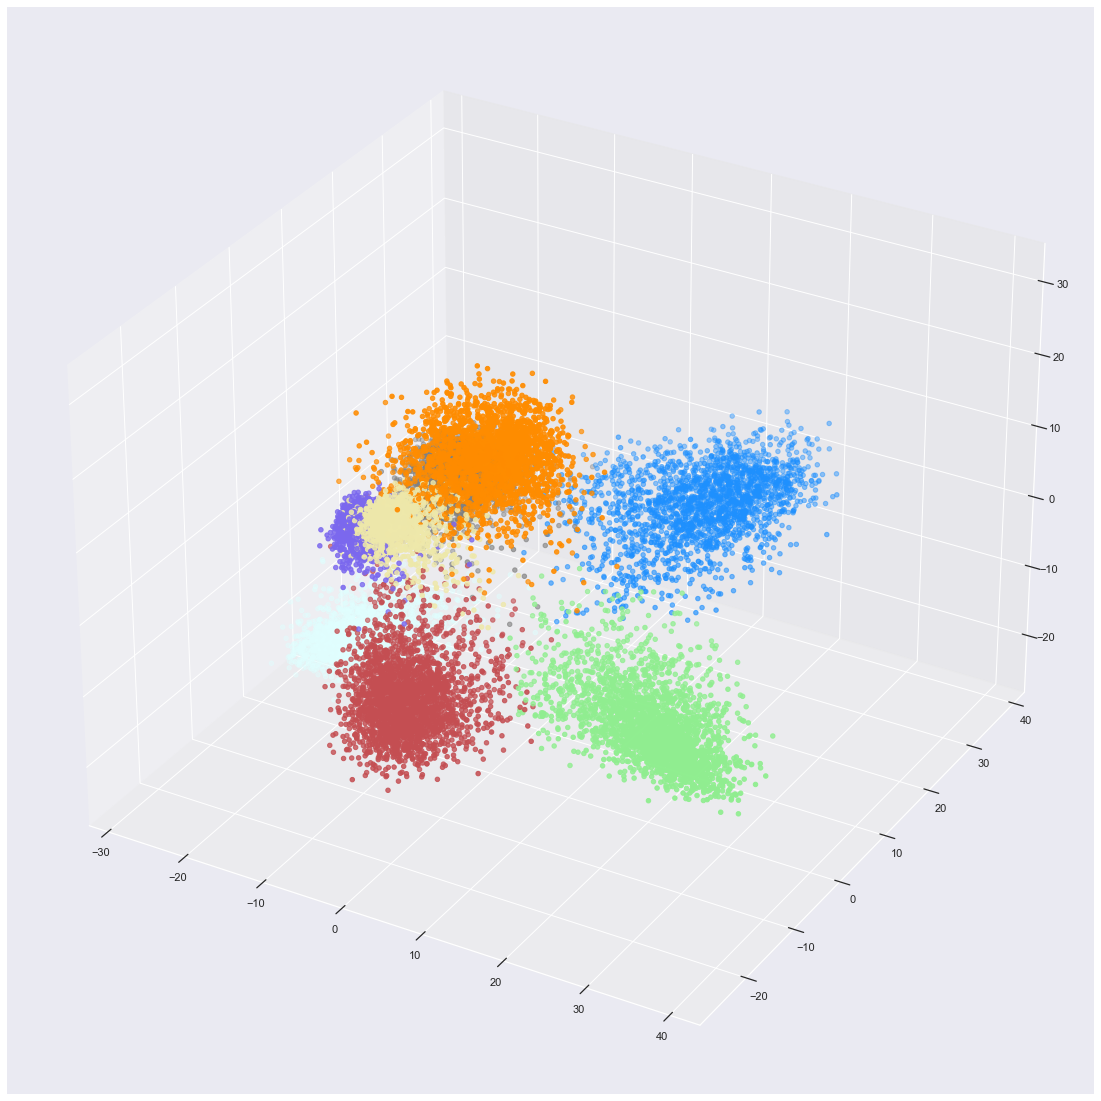

In [45]:
from mpl_toolkits.mplot3d import Axes3D 
import matplotlib.pyplot as plt 
   
fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(111, projection = '3d') 
ax.scatter(pca_data[0], pca_data[1], pca_data[2],  
           c = list(map(lambda label : cluster_colors[label], 
                                            kmeans8.labels_))) 
   
plt.show() 

## Inertia/Elbow Test for corr > 0.8

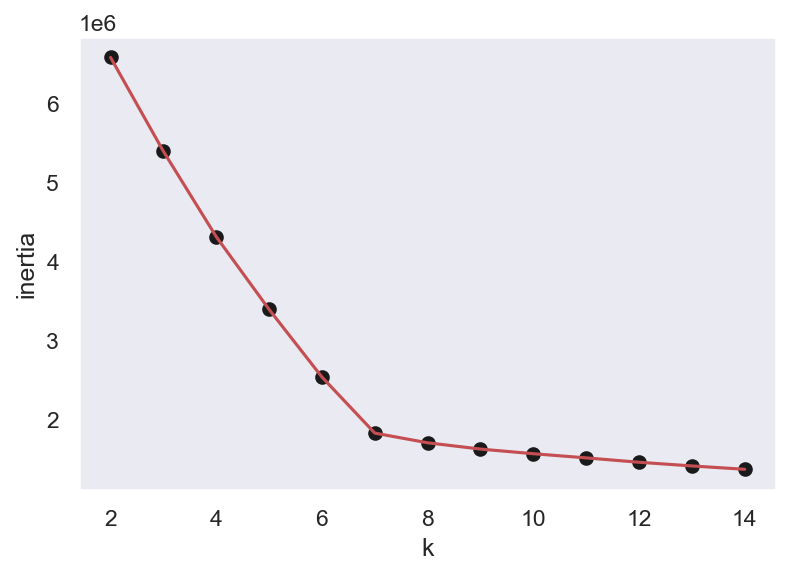

7 Clusters are optimal.


In [46]:
x = list(range(2,15))                                      # K-cluster numbers range from 2 to 15
inertia = [ ]
for i in x: 
    kmeans = KMeans(n_clusters = i).fit(df8)
    inertia.append(kmeans.inertia_)                # Run Elbow test for K-clusters 2 to 15
    
plt.figure(dpi=150)
plt.plot(x, inertia, 'ko')
plt.plot(x, inertia, 'r-')
plt.xlabel('k'); plt.ylabel('inertia')
plt.grid(); plt.show(); print ('7 Clusters are optimal.')

## Silhouette Test for corr > 0.8

In [ ]:
silhouette_score_values=list()
 
NumberOfClusters=range(2,15)                 # K-cluster numbers range from 2 to 15
 
for i in NumberOfClusters:
    
    classifier=cluster.KMeans(i,init='k-means++', n_init=50, max_iter=300, tol=0.0001, verbose=0, random_state=None, copy_x=True)
    classifier.fit(df8)
    labels= classifier.predict(df8)
    print ("Number Of Clusters:")
    print (i)
    print ("Silhouette score value")
    print (sklearn.metrics.silhouette_score(df8,labels ,metric='euclidean', sample_size=None, random_state=None))
    silhouette_score_values.append(sklearn.metrics.silhouette_score(df8,labels ,metric='euclidean', sample_size=None, random_state=None))
 
plt.plot(NumberOfClusters, silhouette_score_values)
plt.title("Silhouette score values vs Numbers of Clusters ")
plt.show()
 
Optimal_NumberOf_Components=NumberOfClusters[silhouette_score_values.index(max(silhouette_score_values))]
print ("Optimal number of components is:")
print (Optimal_NumberOf_Components)

Number Of Clusters:
2
Silhouette score value
0.24683258
Number Of Clusters:
3
Silhouette score value
0.26239747
Number Of Clusters:
4
Silhouette score value
0.33115864
Number Of Clusters:
5
Silhouette score value
0.38631442
Number Of Clusters:
6
Silhouette score value
0.4449703
Number Of Clusters:
7
Silhouette score value
0.48522818
Number Of Clusters:
8
Silhouette score value
0.4591428
Number Of Clusters:
9
Silhouette score value
0.42622164
Number Of Clusters:
10
Silhouette score value
0.37812012
Number Of Clusters:
11
Silhouette score value
0.3331569


## Visualize the clusters (corr > 0.8)

### Cluster = 6

In [ ]:
kmeans6 = KMeans(6,init='k-means++', n_init= 50, max_iter=300, tol=0.0001, verbose=0, random_state=None, copy_x=True).fit(df8)

print(kmeans6.labels_)

### Principal Component Analysis (3D)

In [ ]:
pca = PCA(3)
pca.fit(df8)

pca_data = pd.DataFrame(pca.transform(df8))

print(pca_data.head())

In [ ]:
# number of steps to taken generate n(clusters) colors  
skips = math.floor(len(colors[5 : -5])/6) 
cluster_colors = colors[5 : -5 : skips] 

### Scatter Plot for 6 Clusters

In [ ]:
fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(111, projection = '3d') 
ax.scatter(pca_data[0], pca_data[1], pca_data[2],  
           c = list(map(lambda label : cluster_colors[label], 
                                            kmeans6.labels_))) 

plt.show() 

### Cluster = 7

In [ ]:
kmeans7 = KMeans(7,init='k-means++', n_init=50, max_iter=300, tol=0.0001, verbose=0, random_state=None, copy_x=True).fit(df8)

print(kmeans7.labels_)

In [ ]:
# number of steps to taken generate n(clusters) colors  
skips = math.floor(len(colors[5 : -5])/7) 
cluster_colors = colors[5 : -5 : skips] 

### Scatter Plot for 7 Clusters

In [ ]:
from mpl_toolkits.mplot3d import Axes3D 
import matplotlib.pyplot as plt 
   
fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(111, projection = '3d') 
ax.scatter(pca_data[0], pca_data[1], pca_data[2],  
           c = list(map(lambda label : cluster_colors[label], 
                                            kmeans7.labels_))) 
   
plt.show() 

### Cluster = 8

In [ ]:
kmeans8 = KMeans(8,init='k-means++', n_init=50, max_iter=300, tol=0.0001, verbose=0, random_state=None, copy_x=True).fit(df8)

print(kmeans8.labels_)

In [ ]:
# number of steps to taken generate n(clusters) colors  
skips = math.floor(len(colors[5 : -5])/8) 
cluster_colors = colors[5 : -5 : skips] 

### Scatter Plot for 8 Clusters

In [ ]:
from mpl_toolkits.mplot3d import Axes3D 
import matplotlib.pyplot as plt 
   
fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(111, projection = '3d') 
ax.scatter(pca_data[0], pca_data[1], pca_data[2],  
           c = list(map(lambda label : cluster_colors[label], 
                                            kmeans8.labels_))) 
   
plt.show() 

## Inertia/Elbow Test for corr > 0.9

In [ ]:
x = list(range(2,15))                                      # K-cluster numbers range from 2 to 15
inertia = [ ]
for i in x: 
    kmeans = KMeans(n_clusters = i).fit(df9)
    inertia.append(kmeans.inertia_)                # Run Elbow test for K-clusters 2 to 15
    
plt.figure(dpi=150)
plt.plot(x, inertia, 'ko')
plt.plot(x, inertia, 'r-')
plt.xlabel('k'); plt.ylabel('inertia')
plt.grid(); plt.show(); print ('5 Clusters are optimal.')

## Silhouette Test for corr > 0.9

In [ ]:
silhouette_score_values=list()
 
NumberOfClusters=range(2,15)                 # K-cluster numbers range from 2 to 15
 
for i in NumberOfClusters:
    
    classifier=cluster.KMeans(i,init='k-means++', n_init=50, max_iter=300, tol=0.0001, verbose=0, random_state=None, copy_x=True)
    classifier.fit(df9)
    labels= classifier.predict(df9)
    print ("Number Of Clusters:")
    print (i)
    print ("Silhouette score value")
    print (sklearn.metrics.silhouette_score(df9,labels ,metric='euclidean', sample_size=None, random_state=None))
    silhouette_score_values.append(sklearn.metrics.silhouette_score(df9,labels ,metric='euclidean', sample_size=None, random_state=None))
 
plt.plot(NumberOfClusters, silhouette_score_values)
plt.title("Silhouette score values vs Numbers of Clusters ")
plt.show()
 
Optimal_NumberOf_Components=NumberOfClusters[silhouette_score_values.index(max(silhouette_score_values))]
print ("Optimal number of components is:")
print (Optimal_NumberOf_Components)

## Visualize the clusters (corr > 0.9)

### Cluster = 4

In [ ]:
kmeans4 = KMeans(4,init='k-means++', n_init= 50, max_iter=300, tol=0.0001, verbose=0, random_state=None, copy_x=True).fit(df9)

print(kmeans4.labels_)

### Principal Component Analysis (3D)

In [ ]:
pca = PCA(3)
pca.fit(df9)

pca_data = pd.DataFrame(pca.transform(df9))

print(pca_data.head())

In [ ]:
# number of steps to taken generate n(clusters) colors  
skips = math.floor(len(colors[5 : -5])/4) 
cluster_colors = colors[5 : -5 : skips] 

### Scatter Plot for 4 Clusters

In [ ]:
fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(111, projection = '3d') 
ax.scatter(pca_data[0], pca_data[1], pca_data[2],  
           c = list(map(lambda label : cluster_colors[label], 
                                            kmeans4.labels_))) 

plt.show() 

### Cluster = 5

In [ ]:
kmeans5 = KMeans(5,init='k-means++', n_init= 50, max_iter=300, tol=0.0001, verbose=0, random_state=None, copy_x=True).fit(df9)

print(kmeans5.labels_)

In [ ]:
# number of steps to taken generate n(clusters) colors  
skips = math.floor(len(colors[5 : -5])/5) 
cluster_colors = colors[5 : -5 : skips] 

### Scatter Plot for 5 Clusters

In [ ]:
fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(111, projection = '3d') 
ax.scatter(pca_data[0], pca_data[1], pca_data[2],  
           c = list(map(lambda label : cluster_colors[label], 
                                            kmeans5.labels_))) 

plt.show() 

### Cluster = 6

In [ ]:
kmeans6 = KMeans(6,init='k-means++', n_init= 50, max_iter=300, tol=0.0001, verbose=0, random_state=None, copy_x=True).fit(df9)

print(kmeans6.labels_)

In [ ]:
# number of steps to taken generate n(clusters) colors  
skips = math.floor(len(colors[5 : -5])/6) 
cluster_colors = colors[5 : -5 : skips] 

### Scatter Plot for 6 Clusters

In [ ]:
fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(111, projection = '3d') 
ax.scatter(pca_data[0], pca_data[1], pca_data[2],  
           c = list(map(lambda label : cluster_colors[label], 
                                            kmeans6.labels_))) 

plt.show() 

### Cluster = 7

In [ ]:
kmeans7 = KMeans(7,init='k-means++', n_init=50, max_iter=300, tol=0.0001, verbose=0, random_state=None, copy_x=True).fit(df9)

print(kmeans7.labels_)

In [ ]:
# number of steps to taken generate n(clusters) colors  
skips = math.floor(len(colors[5 : -5])/7) 
cluster_colors = colors[5 : -5 : skips] 

### Scatter Plot for 7 Clusters

In [ ]:
from mpl_toolkits.mplot3d import Axes3D 
import matplotlib.pyplot as plt 
   
fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(111, projection = '3d') 
ax.scatter(pca_data[0], pca_data[1], pca_data[2],  
           c = list(map(lambda label : cluster_colors[label], 
                                            kmeans7.labels_))) 
   
plt.show() 

### Cluster = 8

In [ ]:
kmeans8 = KMeans(8,init='k-means++', n_init=50, max_iter=300, tol=0.0001, verbose=0, random_state=None, copy_x=True).fit(df9)

print(kmeans8.labels_)

In [ ]:
# number of steps to taken generate n(clusters) colors  
skips = math.floor(len(colors[5 : -5])/8) 
cluster_colors = colors[5 : -5 : skips] 

### Scatter Plot for 8 Clusters

In [ ]:
from mpl_toolkits.mplot3d import Axes3D 
import matplotlib.pyplot as plt 
   
fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(111, projection = '3d') 
ax.scatter(pca_data[0], pca_data[1], pca_data[2],  
           c = list(map(lambda label : cluster_colors[label], 
                                            kmeans8.labels_))) 
   
plt.show() 

In [ ]:
kmeans= KMeans(n_clusters=3)
X_clustered=kmeans.fit_predict(x_10d)

LABEL_COLOR_MAP = {0:'r', 1 : 'g' ,2 : 'b'}
label_color=[LABEL_COLOR_MAP[l] for l in X_clustered]

#plot the scatter diagram

plt.figure(figsize=(7,7))
plt.scatter(x_10d[:,0],x_10d[:,2] , c=label_color, alpha=0.5)
plt.show()

In [ ]:
N_CLUSTERS = 8
x_clustered = kmeans.fit_predict(df9)

clusters = [df9[X_clustered == i] for i in range(N_CLUSTERS)]
# replace x_10d with where you want to retrieve data

# to have a look
for i, c in enumerate(clusters):
    print('Cluster {} has {} members: {}...'.format(i, len(c), c[0]))